# Deckmap Visualization

---

This is a notebook to generate visualizations for Opentrons deckmaps in Jupyter Notebook Protocols. It's composed of two sections:

- A visualiser for single pieces of labware (to generate images for custom labware and check if a labware .json file is correct)
- A visualiser for entire deckmaps you might use in a protocol (to generate deckmap images for a protocol page)

!!! Remember to run this in Python 3.10 (for opentrons dependencies)

---

In [1]:
# IMPORT DEPENDENCIES
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# For single pieces of labware from .json

In [61]:
# IMPORT CUSTOM LABWARE FILE
# replace below string with the path to your file

with open('custom_labware/example.json') as file:
    obj = json.loads(file.read())

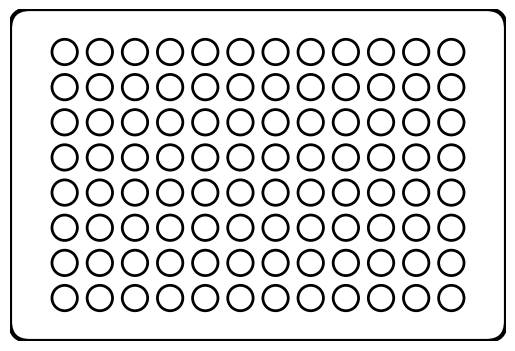

In [69]:
fig, ax = plt.subplots(1)

x = obj["dimensions"]['xDimension']
y = obj["dimensions"]['yDimension']

rect = patches.FancyBboxPatch((0,0), x, y, boxstyle='round, rounding_size=5, pad=0', linewidth=3, edgecolor='k', facecolor='none')
ax.add_patch(rect)

for name, well in obj['wells'].items():
    if well['shape'] == 'rectangular':
        well_w = well['xDimension']
        well_h = well['yDimension']
        well_x = well['x']-well_w/2
        well_y = well['y']-well_h/2
        rect = patches.Rectangle((well_x, well_y), well_w, well_h, linewidth=2, edgecolor='k', facecolor='none')
        ax.add_patch(rect)
        #plt.text(well['x'], well['y'], name, horizontalalignment='center', verticalalignment='center', fontsize='small')
    elif well['shape'] == 'circular':
        circ = patches.Circle((well['x'], well['y']), well['diameter']/2, linewidth=2, edgecolor='k', facecolor='none')
        ax.add_patch(circ)
        #plt.text(well['x'], well['y'], name, horizontalalignment='center', verticalalignment='center', fontsize='small')

plt.xlim(0, x)
plt.ylim(0, y)
ax.set_axis_off()
ax.set_aspect('equal', adjustable='box')

plt.show()

# For full deck setups in protocols

On the cell below, paste the entire initial setup of your deck. I have a commented-out example so you can see which part of the protocol to use.

In [2]:
"""
from opentrons import simulate

protocol = simulate.get_protocol_api('2.13')

with open('custom_labware/example.json') as labware_file:
    labware_def = json.load(labware_file)
    culture_plate = protocol.load_labware_from_definition(labware_def, 1)

destination_plates = [protocol.load_labware('biorad_96_wellplate_200ul_pcr', '2'),
                      protocol.load_labware('biorad_96_wellplate_200ul_pcr', '3'),
                      protocol.load_labware('biorad_96_wellplate_200ul_pcr', '5'),
                      protocol.load_labware('biorad_96_wellplate_200ul_pcr', '6')]
                      
                      
glyc_res = protocol.load_labware('nest_1_reservoir_195ml', '4')

tipracks_300 = [protocol.load_labware('opentrons_96_tiprack_300ul', '7')]    
"""

C:\Users\Felipe\.opentrons\robot_settings.json not found. Loading defaults
C:\Users\Felipe\.opentrons\deck_calibration.json not found. Loading defaults


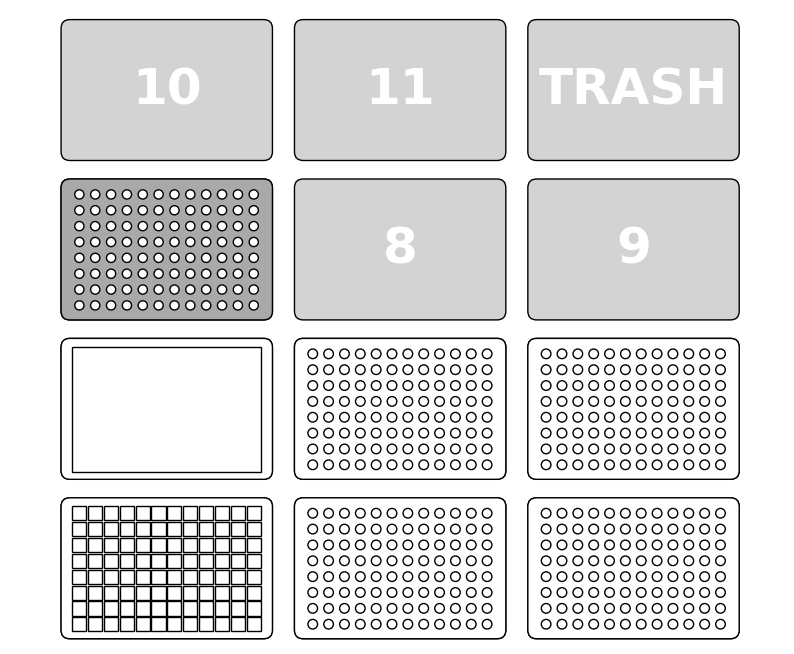

In [3]:
fig, ax = plt.subplots(1, figsize=(10, 10))

deck_positions = {1:(4, 3), 2:(136.5, 3), 3:(269, 3),
                  4:(4, 93.5), 5:(136.5, 93.5), 6:(269, 93.5),
                  7:(4, 184), 8:(136.5, 184), 9:(269, 184),
                  10:(4, 274.5), 11:(136.5, 274.5), 12:(269, 274.5)}

for pos, coords in deck_positions.items():    
    rect = patches.FancyBboxPatch((coords[0],coords[1]),
                                  120, 80,
                                  boxstyle='round, rounding_size=5, pad=0',
                                  facecolor='lightgrey',
                                  zorder=0)
    ax.add_patch(rect)
    
    if pos == 12:
        pos = 'TRASH'
    
    plt.text(coords[0]+60, coords[1]+40, str(pos),
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=36,
             fontweight='bold',
             color='w',
             zorder=1)

for name, mod in protocol.loaded_modules.items():
    mod_w = 146
    mod_h = 86
    if name in [1, 4, 7, 10]:
        if mod.geometry.module_type == 'thermocyclerModuleType':
            x_off = 0
            mod_w = 160
            mod_h = 175
        else:
            x_off = -20
    elif name in [3, 6, 9]:
        x_off = 0
    rect = patches.FancyBboxPatch((deck_positions[name][0]+x_off-3,deck_positions[name][1]-3),
                                  mod_w, mod_h,
                                  boxstyle='round, rounding_size=5, pad=0',
                                  facecolor='grey',
                                  zorder=1
                                 )
    ax.add_patch(rect)

for name, obj in protocol.loaded_labwares.items():
    if name != 12:
        if obj.is_tiprack:
            color = 'darkgrey'
        else:
            color = 'w'
        lab_x = obj.calibrated_offset.x + 4
        lab_y = obj.calibrated_offset.y + 3
        rect = patches.FancyBboxPatch((lab_x,lab_y),
                                      120, 80,
                                      boxstyle='round, rounding_size=5, pad=0',
                                      linewidth=1,
                                      facecolor=color)
        ax.add_patch(rect)
        for well in obj.wells():
            well_x = well.geometry.position.x
            well_y = well.geometry.position.y
            if well.diameter != None:
                circ = patches.Circle((well_x, well_y),
                                      well.diameter/2,
                                      linewidth=1,
                                      edgecolor='k',
                                      facecolor='w')
                ax.add_patch(circ)
            else:
                well_h = well.width
                well_w = well.length
                rect = patches.Rectangle((well_x-well_w/2, well_y-well_h/2),
                                         well_w, well_h,
                                         linewidth=1,
                                         edgecolor='k',
                                         facecolor='w')
                ax.add_patch(rect)

plt.xlim(-25, 415)
plt.ylim(0, 360)
ax.set_axis_off()
ax.set_aspect('equal', adjustable='box')

plt.show()